<a href="https://colab.research.google.com/github/victorviro/Design-of-experiments/blob/master/Statistical_hypothesis_tests_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


1. [Introduction](#1)
    1. [Hypothesis testing](#1.1)
        1. [Example: Independent two-sample t-test](#1.1.1)
        2. [Statistical test interpretation](#1.1.2)
            1. [Critical values](#1.1.2.1)
            1. [P-values](#1.1.2.2)
    2. [Confidence intervals](#1.2)
2. [Summary statistical tests](#2)
    1. [Inferences about the means](#2.1)
        1. [Analysis of variance](#2.1.1)
            1. [Post-hoc analysis](#2.1.1.1)
    2. [Inferences about the variances](#2.2)
        1. [Inferences about the variances of normal distributions](#2.2.1)
        2. [Statistical tests for equality of variance](#2.2.2)
    3. [Normality tests](#2.3)
    4. [Nonparametric tests](#2.4)
    5. [Correlation tests](#2.5)
3. [References](#3)




# 1 Introduction <a name="1"></a>

In statistics, when we wish to start asking **questions about the data** and interpret the results, we use **statistical methods** that provide confidence or likelihood about the answers. In general, this class of methods is called [**statistical hypothesis testing**](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), or significance tests.

In this notebook, we explain the key **concepts of statistical hypothesis testing**. Then, we **summarize some of the most used statistical tests**. 

## 1.1 Hypothesis testing <a name="1.1"></a>

A statistical hypothesis is a **statement** or assumption either about the parameters of a probability distribution or the parameters of a model. The hypothesis reflects some conjecture about the problem situation. The result of the test allows us to **interpret whether the assumption holds or has to be rejected**.

Some concrete examples might be:

- A test that assumes that data follows a normal distribution.
- A test that assumes that the mean of 2 independent samples is equal.

Let's think about the last example. This may be stated formally as 

$$
H_0: \mu_1=\mu_2\\
H_1: \mu_1\neq\mu_2
$$

where $\mu_1$ is the mean of the first sample and $\mu_2$ is the mean of the second sample. The statement $H_0: \mu_1=\mu_2$ is called the **null hypothesis** and $H_1: \mu_1\neq\mu_2$ is called the **alternative hypothesis**. The alternative hypothesis specified here is called a two-sided alternative hypothesis because it would be true if $\mu_1<\mu_2$ or if $\mu_1>\mu_2$.

To test a hypothesis, we compute an appropriate **test statistic**, and then reject or fail to reject $H_0$ based on the computed value of the test statistic. Part of this procedure is specifying the set of values for the test statistic that leads to reject $H_0$. This set of values is called the **critical region** or rejection region for the test.

Two kinds of errors may be committed when testing hypotheses. If the null hypothesis is rejected when it is true, a type $I$ error has occurred. If the null hypothesis is not rejected when it is false, a type $II$ error has been made. The probabilities of these two errors are given special symbols

$$
\alpha=P(\text{type I error})=P(\text{reject $H_0$|$H_0$ is true})\\
\beta=P(\text{type II error})=P(\text{fail to reject $H_0$|$H_0$ is false})
$$

Sometimes it is more convenient to work with the **power** of the test:

$$
\text{Power}=1-\beta=P(\text{reject $H_0$|$H_0$ is false})
$$

The general procedure in hypothesis testing is to specify a value of the probability of type $I$ error $\alpha$, often called the **significance level** of the test, and then design the test procedure so that the probability of type $II$ error $\beta$ has a suitably small value.

### 1.1.1 Example: Independent two-Sample t-Test <a name="1.1.1"></a>

Assuming that both samples are independent, they come from a normal distribution, and they have identical variances, then the appropriate test statistic to use for comparing two sample means is

$t_o=\frac{\overline{y_1}-\overline{y_2}}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\sim t_{n_1+n_2-2}$

where $\overline{y_1}$ and $\overline{y_2}$ are the sample means, $n_1$ and $n_2$ are the sample sizes, $S^2_p$ is an estimate of the common variance $\sigma^2_1=\sigma^2_2=\sigma^2$, 
and $t_{n_1+n_2-2}$ is the $t$ distribution with $n_1+n_2-2$ degrees of freedom.

### 1.1.2 Statistical test interpretation <a name="1.1.2"></a>

There are **two common forms to interpret a statistical hypothesis test**, and they are interpreted in different ways. They are the **critical values and the p-value**.

#### 1.1.2.1 Critical values <a name="1.1.2.1"></a>

A test statistic calculated by a statistical hypothesis test can be interpreted using critical values from the distribution of the test statistic.

A [**critical value**](https://en.wikipedia.org/wiki/Critical_value) is defined in the context of the population distribution and probability.

$$P(X\leq \text{critical value})=p$$

Where $X$ are observations from the population, $\text{critical value}$ is the calculated critical value, and $p$ is the chosen probability.

Critical values are calculated using a mathematical function where the probability is provided as an argument. For most common distributions, the value cannot be calculated analytically; instead, it must be estimated using numerical methods. Historically it is common for tables of pre-calculated critical values to be provided in the appendices of statistics textbooks for reference purposes.

When critical values are used in statistical significance testing, the probability is often expressed as a significance, denoted as $\alpha$, which is the inverted probability.

$$p=1-\alpha$$

Calculated critical values are used as a threshold for interpreting the result of a statistical test.

The observation values in the population beyond the critical value are often called the **critical region** or the *“region of rejection"*.

**One-Tailed Test**

A one-tailed test or one-sided test has a single critical value, such as on the left or the right of the distribution. Often, a one-tailed test has a critical value on the right of the distribution for non-symmetrical distributions (such as the Chi-Squared distribution).

The statistic is compared to the calculated critical value. If the statistic is less than or equal to the critical value, we fail to reject the null hypothesis. Otherwise, it is rejected.

We can summarize this interpretation as follows:

- $\text{Test Statistic}\leq \text{Critical Value}$: Fail to reject the null hypothesis of the statistical test.
- $\text{Test Statistic}> \text{Critical Value}$: Reject the null hypothesis of the statistical test.

**Two-Tailed Test**

A two-tailed test or two-sided test has two critical values, one on each side of the distribution, which is often assumed to be symmetrical (e.g. Gaussian and Student-t distributions).

When using a two-tailed test, a significance level ($\alpha$) used in the calculation of the critical values must be divided by 2. The critical value will then use a portion of this alpha on each side of the distribution. To make this concrete, consider an alpha of 5%. This would be split to give two alpha values of 2.5% on either side of the distribution with an acceptance area in the middle of the distribution of 95%.

We can refer to each critical value as the lower and upper critical values for the left and right of the distribution respectively. Test statistic values more than or equal to the lower critical value and less than or equal to the upper critical value indicate the failure to reject the null hypothesis. Whereas test statistic values less than the lower critical value and more than the upper critical value indicates rejection of the null hypothesis for the test.

We can summarize this interpretation as follows:

- $\text{Lower CR} \leq \text{Test Statistic} \leq \text{Upper CR}$: Failure to reject the null hypothesis of the statistical test.

- $\text{Test Statistic} < \text{Lower CR} \text{ OR } \text{Test Statistic} > \text{Upper CR}$: Reject the null hypothesis of the statistical test.

If the distribution of the test statistic is symmetric around a mean of zero, then we can shortcut the check by comparing the absolute value of the test statistic to the upper critical value.

- $|\text{Test Statistic}| \leq \text{Upper Critical Value}$: Failure to reject the null hypothesis of the statistical test.

Where $|\text{Test Statistic}|$ is the absolute value of the calculated test statistic.

In our two-sample $t$-test example (a two-tailed test), to determine whether to reject $H_0$, we would compare the value of the test statistic, $t_0$, to the upper critical value. If $|t_0|> t_{\frac{\alpha}{2},n_1+n_2-2}$, where $t_{\frac{\alpha}{2},n_1+n_2-2}$ is the upper $\frac{\alpha}{2}$ percentage point of the $t$ distribution with $n_1+n_2-2$ degrees of freedom, we would reject $H_0$ and conclude that the mean of the two samples differ. 

#### 1.1.2.2 P-values <a name="1.1.2.2"></a>

The [**P-value**](https://en.wikipedia.org/wiki/P-value) is the **probability that the test statistic takes on the observed value** (or at least as extreme as it) **when the null hypothesis $H_0$ is true**. In simple terms, this value helps us to differentiate results caused by the randomness of statistically significant results. More formally, we define the P-value as the smallest level of significance that would lead to rejection of the null hypothesis $H_0$. It is not always easy to compute the exact P-value for a test. However, most modern computer programs for statistical analysis report P-values.

If $\text{p-value}<\alpha$ then the null hypothesis $H_0$ would be rejected at level of significance $\alpha$. For instance, say that the P-value is 0, then the probability that the test statistic takes on the observed value is 0 under $H_0$, and hence we'll reject $H_0$.

## 1.2 Confidence Intervals <a name="1.2"></a>

Although hypothesis testing is a useful procedure, it sometimes does not tell the entire story. It is often preferable to provide an interval within which the value of the parameter or parameters in question would be expected to lie. These interval statements are called **confidence intervals**. 

To define a confidence interval, suppose that $\theta$ is an unknown parameter. To obtain an interval estimate of $\theta$, we need to find two statistics $L$ and $U$ such that the probability statement 

$$P(L\leq \theta\leq U)=1-\alpha$$

is true. The interval 

$$L\leq \theta\leq U$$
 
is called a **$100(1-\alpha$) percent confidence interval** for the parameter $\theta$. The interpretation of this interval is that if, in repeated random samplings, a large number of such intervals are constructed, $100(1-\alpha)$ percent of them will contain the true value of $\theta$. The statistics $L$ and $U$ are called the **lower and upper confidence limits**, respectively, and $1-\alpha$ is called the **confidence coefficient**. 

Suppose that we wish to find a $100(1-\alpha$) percent confidence interval on the true difference in means $\mu_1-\mu_2$ for the previous example (independent two sample t-Test). The interval can be derived in the following way. The test statistic is

$$\frac{\overline{y_1}-\overline{y_2}-(\mu_1-\mu_2)}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\sim t_{n_1+n_2-2}$$

Thus

$$
P(-t_{\frac{\alpha}{2},n_1+n_2-2}\leq\frac{\overline{y_1}-\overline{y_2}-(\mu_1-\mu_2)}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\leq t_{\frac{\alpha}{2},n_1+n_2-2})
$$

And finally, the $100(1-\alpha$) percent confidence interval for $\mu_1-\mu_2$ can be obtained from the following equation:

$$\overline{y_1}-\overline{y_2}-t_{n_1+n_2-2}S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}\leq \mu_1-\mu_2 \leq \overline{y_1}-\overline{y_2}+t_{n_1+n_2-2}S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$

The actual 95 percent confidence interval estimate for the difference in mean for the two samples of the previous example is found by substituting in the equation.

## 1.3 Choice of sample size

# 2 Summary statistical tests <a name="2"></a>

There are hundreds of statistical hypothesis tests that we could use though, we are going to focus on a small subset that we may need to use in machine learning. 

- Some tests can be used in the exploratory data analysis phase to better understand the relationship between variables.

- Other tests can be used to assess the impact of a model on the business through [A/B testing](https://en.wikipedia.org/wiki/A/B_testing).

- Once an supervised ML model is deployed in production, a practical approach to monitor its performance degradation is *drift detection*. It suggests that if the data distribution diverges between the training and inference phases, it is a strong signal that the model’s performance won’t be the same. It's common the use of statistical tests to check if the distribution of the features does not vary between these two phases.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

## 2.1 Inferences about the means <a name="2.1"></a>

- We have already explained the [**independent two-sample t-test**](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) to check that the **mean of two samples are equal**. We assumed that both samples were **independent**, they come from **normal populations**, and they have **identical variances**. The null hypothesis of the test is that the means of two populations are equal. A rejection of this hypothesis indicates that there is evidence that the means of the populations are different (and in turn that the distributions are not equal). We can use the [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) Scipy function to implement this test. First, we will generate two samples drawn from a Gaussian distribution. Observations in the first sample have a mean of 50 and a standard deviation of 5. Observations in the second sample have a mean of 52 and a standard deviation of 5.

 We expect the statistical test discovers that the mean of these two samples is not equal.

 **Note**: Generally, small to moderate violations of the assumptions are not a major concern, but any failure of the independence assumption and strong indications of nonnormality should not be ignored. Both the significance level of the test and the ability to detect differences between the means will be adversely affected by departures from assumptions. Transformations are one approach to dealing with this problem. Nonparametric tests can also be used if the observations come from nonnormal populations (see the section "Nonparametric tests").

In [2]:
np.random.seed(1)
sample_size = 100
sample_a = np.random.normal(size=sample_size, loc=50, scale=5)
sample_b = np.random.normal(size=sample_size, loc=52, scale=5)
print(f'Sample A: mean={np.mean(sample_a):.3f} stdv={np.std(sample_a):.3f}')
print(f'Sample B: mean={np.mean(sample_b):.3f} stdv={np.std(sample_b):.3f}')
dataset = pd.DataFrame({
    "sample": np.concatenate((np.full((sample_size,), "A"), np.full((sample_size,), "B"))),
    "values": np.concatenate((sample_a, sample_b))
})

Sample A: mean=50.303 stdv=4.426
Sample B: mean=52.764 stdv=4.660


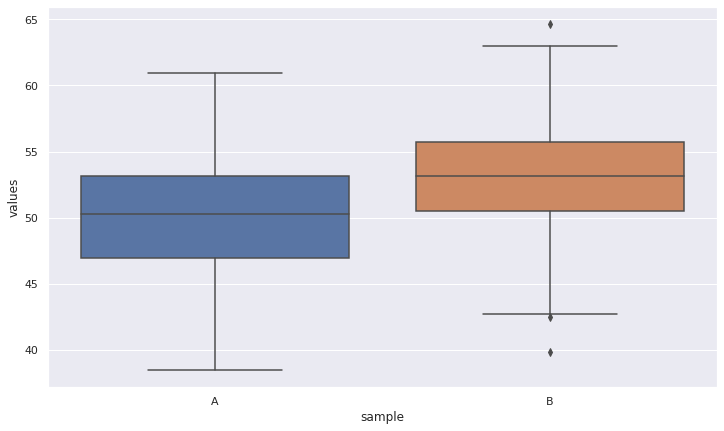

In [3]:
plt.figure(figsize=(12,7))
sns.boxplot(x="sample", y="values", data=dataset)

In [4]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(sample_a, sample_b)
print(f'Statistics={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('The means of the populations are equal (fail to reject H0).')
else:
	print('The means of the populations are different (reject H0).')

Statistics=-3.810, P-value=0.000
The means of the populations are different (reject H0).


- In the case that the **variances are not equal** for both samples we must use a slightly modified test statistic ([***Welch's t-test***](https://en.wikipedia.org/wiki/Welch%27s_t-test)). To apply this test we can use the `ttest_ind()` function we just have used but set the parameter `equal_var=False`. 

- The two **samples** can be **dependent or paired**, that is, **each data point in one sample is uniquely paired to a data point in the second sample**. Because the samples are not independent, we cannot use the previous test. Instead, we must use a modified version of the test that corrects for the fact that the data samples are dependent, called the **paired Student’s t-test** or [**dependent t-test for paired samples**](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples). This test can be implemented in python using the [`ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) Scipy function.  This test is a [paired difference test](https://en.wikipedia.org/wiki/Paired_difference_test).


- If the **variances** for both samples are **known**, and both populations are normal (or if the sample sizes are large enough so that the central limit theorem, CLT, applies) then the hypothesis may be tested using a direct application of the normal distribution (the **two-sample Z-test**). Unlike the t-test of the previous sections, the test on means with known variances **does not require** the assumption of **sampling from normal populations**. We can use the CLT to justify an approximate normal distribution for the difference in sample means $y_1-y_2$, and [standarize](https://en.wikipedia.org/wiki/Standard_score#Z-test) this difference so the test statistic follows a standard normal distribution.

- Some experiments involve **comparing** only one **population mean $\mu$ to a specified value**, say, $\mu_0$ . The null hypothesis is $H_0: \mu=\mu_0$. 

 - If the **variance is known and the population is normal** (or the sample size is large enough so that the CLT applies), then the hypothesis may be tested using a direct application of the normal distribution (the **one-sample** [**Z-test**](https://en.wikipedia.org/wiki/Z-test)). 
 - If the **variance** of the population is **unknown**, we must make the additional assumption that the population is normally distributed, although moderate departures from normality will not seriously affect the results. To test $H_0: \mu=\mu_0$ in the variance unknown case, the sample variance $S^2$ is used to estimate $\sigma^2$ and we used the [**one-sample t-test**](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test). We can use the [`ttest_1samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) Scipy function.

Tables 2.4 and 2.5 summarize the t-test and z-test procedures discussed above for sample means. Critical regions are shown for both two-sided and one-sided alternative hypotheses.

![alt text](https://i.ibb.co/HXwd8dN/means1.png)

![alt text](https://i.ibb.co/yfkL2zY/means2.png)

### 2.1.1 Analysis of variance (ANOVA) <a name="2.1.1"></a>

We may have **multiple independent data samples**. We can perform the Student’s t-test pairwise on each combination of the data samples to get an idea of which samples have different means. This can be onerous if we are only interested in whether all samples have the same distribution or not.

The [**Analysis of variance (ANOVA)**](https://en.wikipedia.org/wiki/Analysis_of_variance) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to **analyze the differences among group means**.
ANOVA provides a statistical **test to check when two or more population means are equal** ($H_0$), and therefore **generalizes the t-test beyond two means**. It cannot quantify which samples differ or by how much. 

The test requires that the **data samples are a Gaussian distribution**, that the samples are **independent**, and that all data samples have the **same standard deviation**.

The ANOVA one-factor test can be performed in Python using the [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) SciPy function or the [`anova_lm`](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm) function from the statsmodels package.

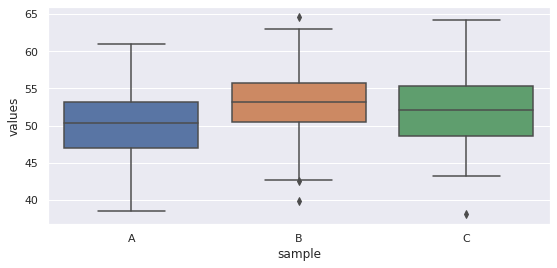

In [5]:
np.random.seed(1)
sample_size = 100
sample_a = np.random.normal(size=sample_size, loc=50, scale=5)
sample_b = np.random.normal(size=sample_size, loc=52, scale=5)
sample_c = np.random.normal(size=sample_size, loc=52, scale=5)

dataset = pd.DataFrame({
    "sample": np.concatenate((np.full((sample_size,), "A"), 
                              np.full((sample_size,), "B"), 
                              np.full((sample_size,), "C"))),
    "values": np.concatenate((sample_a, sample_b, sample_c))
})
plt.figure(figsize=(9,4))
sns.boxplot(x="sample", y="values", data=dataset)

In [6]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(sample_a, sample_b, sample_c)
print(f'Statistic={statistic:.3f}, P-value={p_value:.6f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('The means of the populations are equal (fail to reject H0).')
else:
	print('The means of the populations are different (reject H0).')

Statistic=7.153, P-value=0.000925
The means of the populations are different (reject H0).


In [7]:
# ! pip install statsmodels==0.10.2

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore_lm = ols('values ~ sample', data=dataset).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) 
print(table)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               sum_sq     df         F    PR(>F)
sample     320.568112    2.0  7.153137  0.000925
Residual  6655.033146  297.0       NaN       NaN


**Factorial designs**: Many experiments involve the study of the **effects of two or more factors**. In general, [factorial designs](https://en.wikipedia.org/wiki/Factorial_experiment) are most efficient for this type of experiment. For example, the [two-way ANOVA (or factorial ANOVA)](https://en.wikipedia.org/wiki/Two-way_analysis_of_variance) is an **extension of the one-way ANOVA** that examines the influence of two different categorical independent variables on one continuous dependent variable. This test can be performed using the `anova_lm` statsmodels function we have just used.

#### 2.1.1.1 Post-hoc analysis <a name="2.1.1.1"></a>

**When the ANOVA indicates** that **means differ**, it is usually of interest to make comparisons between the individual means to **discover the specific differences**.

- The [Scheffé’s Method](https://en.wikipedia.org/wiki/Scheff%C3%A9%27s_method) is used to compare any possible contrast between treatment means.

**Comparing pairs of treatment means**: In many practical situations, we will wish to compare only pairs of means. Frequently, we can **determine which means differ by testing the differences between all pairs of means**.

- The [Tukey’s Test](https://en.wikipedia.org/wiki/Tukey%27s_range_test) is a single-step multiple comparison procedure and statistical test that can be used to **find means that are significantly different from each other**. The null hypothesis is $H_0:\mu_i=\mu_j$. This method can be performed using the [`pairwise_tukeyhsd`](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) statsmodels function:

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

paired_test = pairwise_tukeyhsd(dataset["values"], dataset["sample"], alpha=.05)
paired_test._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,2.4611,0.001,0.8841,4.038,True
A,C,1.7462,0.0258,0.1692,3.3232,True
B,C,-0.7149,0.5333,-2.2918,0.8621,False


 For the first two comparisons, since the P-value is smaller than $\alpha=0.05$, $H_0$ is rejected, and we conclude that these pairs of means differ.

## 2.2 Inferences about the variances <a name="2.2"></a>

In some experiments, we are interested in possible **differences in the variability of samples**.

### 2.2.1 Inferences about the variances of normal distributions <a name="2.2.1"></a>

- Suppose we wish to test the hypothesis that the **variance of a normal population equals a constant**, say, $\sigma_0^2$. Formally, we wish to test
$$H_o:\sigma^2=\sigma_0^2$$
$$H_o:\sigma^2\neq \sigma_0^2$$

 We can use the [Chi-squared test for variance in a normal population](https://en.wikipedia.org/wiki/Chi-squared_test#Chi-squared_test_for_variance_in_a_normal_population). The test statistic is 
$$\chi_o^2=\frac{SS}{\sigma_0^2}=\frac{(n-1)S^2}{\sigma_0^2}$$

 where $SS=\sum{i=}{n}(y_{i}-\overline{y})^2$ is the corrected sum of squares of the sample observations. The appropriate reference distribution for $\chi_o^2$ is the chi-square distribution with $n-1$ degrees of freedom. The null hypothesis is rejected if $\chi_o^2>\chi_{\frac{\alpha}{2},n-1}^2$ or if $\chi_o^2<\chi_{1-\frac{\alpha}{2},n-1}^2$.

- Now consider testing the **equality of the variances of two normal populations**. If independent random samples of size $n_1$ and $n_2$ are taken from populations 1 and 2, respectively,the test statistic for
$$H_o:\sigma_1^2=\sigma_2^2$$
$$H_o:\sigma_1^2\neq \sigma_2^2$$
is the ratio of the sample variances $F_0=\frac{S_1^2}{S_2^2}$

 The appropriate reference distribution for $F_0$ is the $F$ distribution with $n_1-1$ numerator degrees of freedom and $n_2-1$ denominator degrees of freedom. The null hypothesis would be  rejected if $F_0>F_{\frac{\alpha}{2},n_1-1,n_2-1}$ or $F_0<F_{1-\frac{\alpha}{2},n_1-1,n_2-1}$.

 **Note**: This test is called [**F-test of equality of variances**](https://en.wikipedia.org/wiki/F-test_of_equality_of_variances). The [F-test](https://en.wikipedia.org/wiki/F-test) is used in a variety of tests including regression analysis, the Chow test, and the Scheffe Test (a post-hoc ANOVA test). 


![alt text](https://i.ibb.co/Z1jKJpZ/gggggg.png)

### 2.2.2 Statistical tests for equality of variance <a name="2.2.2"></a>

**Equal variances across populations** is called **homoscedasticity or homogeneity** of variances. Some statistical tests, for example, the analysis of variance, assume that variances are equal across groups or samples. Although residual plots are frequently used to diagnose inequality of variance, the following tests can be used to verify that assumption. These tests may be viewed as formal tests of the hypotheses

$$H_0: \sigma_1^2=\sigma_2^2=...=\sigma_a^2$$
$$H_1: \text{Avove not true for at least one $\sigma_i^2$}$$

Sample A: mean=49.898 variance=28.324
Sample B: mean=50.322 variance=26.809
Sample C: mean=50.879 variance=53.267


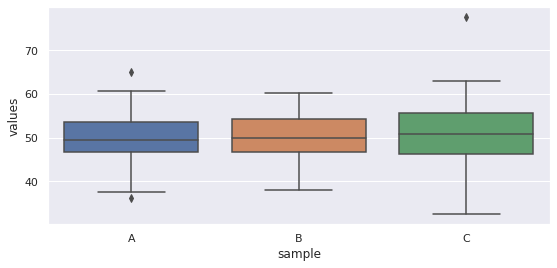

In [10]:
sample_size = 100
sample_a = np.random.normal(size=sample_size, loc=50, scale=5)
sample_b = np.random.normal(size=sample_size, loc=50, scale=5)
sample_c = np.random.normal(size=sample_size, loc=50, scale=7)
print(f'Sample A: mean={np.mean(sample_a):.3f} variance={np.var(sample_a):.3f}')
print(f'Sample B: mean={np.mean(sample_b):.3f} variance={np.var(sample_b):.3f}')
print(f'Sample C: mean={np.mean(sample_c):.3f} variance={np.var(sample_c):.3f}')

dataset = pd.DataFrame({
    "sample": np.concatenate((np.full((sample_size,), "A"), 
                              np.full((sample_size,), "B"), 
                              np.full((sample_size,), "C"))),
    "values": np.concatenate((sample_a, sample_b, sample_c))
})
plt.figure(figsize=(9,4))
sns.boxplot(x="sample", y="values", data=dataset)

The sample variance of `C` is much larger than that of `A` and `B`.

- The [**Bartlett’s test**](https://en.wikipedia.org/wiki/Bartlett%27s_test) is used to test if $k$ samples are from populations with equal variances. The null hypothesis is that all input samples are from populations with equal variances. The procedure involves computing a statistic whose sampling distribution is closely approximated by the chi-square distribution with $a-1$ degrees of freedom when the random samples come from **independent normal populations**. Bartlett’s test is very **sensitive to the normality assumption**. Consequently, when the validity of this assumption is doubtful, Bartlett’s test should not be used.

In [11]:
from scipy.stats import bartlett

statistic, p_value = bartlett(sample_a, sample_b, sample_c)
print(f'Statistics={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Samples are from populations with equal variances (fail to reject H0)')
else:
	print('Not all samples are from populations with equal variances (reject H0)')

Statistics=15.165, P-value=0.001
Not all samples are from populations with equal variances (reject H0)


- [**Levene's test**](https://en.wikipedia.org/wiki/Levene%27s_test) is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups. It is **robust to
departures from normality**.

In [12]:
from scipy.stats import levene

statistic, p_value = levene(sample_a, sample_b, sample_c)
print(f'Statistics={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Samples are from populations with equal variances (fail to reject H0)')
else:
	print('Not all samples are from populations with equal variances (reject H0)')

Statistics=5.513, P-value=0.004
Not all samples are from populations with equal variances (reject H0)


## 2.3 Normality tests <a name="2.3"></a>

**In some statistical models**, like analysis of the variance and regression models, we need to check the **normality assumption** of the residuals. We can check this assumption by plotting a **histogram** of the residuals. If the assumption on the errors is satisfied, this plot should look like a sample from a normal distribution centered at zero. Unfortunately, with small samples, considerable fluctuation in the shape of a histogram often occurs, so the appearance of a moderate departure from normality does not necessarily imply a serious violation of the assumptions. Gross deviations from normality are potentially serious and require further analysis. Another extremely useful procedure is to construct a [**normal probability plot**](https://en.wikipedia.org/wiki/Normal_probability_plot) of the residuals.

In general, moderate departures from normality are of little concern in the fixed effects analysis of variance or two sample t-Test.

Additionally, there are **statistical tests** that we can use to quantify **whether a sample of data looks** as though it was drawn **from a Gaussian distribution**. Each test makes different assumptions and considers different aspects of the data. We will look at 3 commonly used tests in this section that we can apply to our data samples.

In [13]:
np.random.seed(1)
sample_size = 100
sample = np.random.normal(size=sample_size, loc=50, scale=5)

The [**Shapiro-Wilk test**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution. It tests the **null hypothesis that a sample came from a normally distributed population**. In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be **suitable for small samples of data**, e.g. thousands of observations or fewer.

In [14]:
from scipy.stats import shapiro

statistic, p_value = shapiro(sample)
print(f'Statistics={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, P-value=0.822
Sample looks Gaussian (fail to reject H0)


The [**Anderson-Darling test**](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test) is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test).

In [15]:
from scipy.stats import anderson

anderson_result = anderson(sample)
anderson_statistic = anderson_result.statistic 
print(f'Statistic={anderson_statistic:.3f}')
anderson_critical_values = anderson_result.critical_values
anderson_significance_levels = anderson_result.significance_level
anderson_report = zip(anderson_critical_values, anderson_significance_levels)

for critical_value, significance_level in anderson_report:
    if anderson_statistic < critical_value:
        print(f'For significance level {significance_level}, critical value: '
              f'{critical_value}. Data looks normal (fail to reject H0) ')
    else:
        print(f'For significance level {significance_level}, critical value: '
              f'{critical_value}. Data does not look normal (reject H0) ')

Statistic=0.220
For significance level 15.0, critical value: 0.555. Data looks normal (fail to reject H0) 
For significance level 10.0, critical value: 0.632. Data looks normal (fail to reject H0) 
For significance level 5.0, critical value: 0.759. Data looks normal (fail to reject H0) 
For significance level 2.5, critical value: 0.885. Data looks normal (fail to reject H0) 
For significance level 1.0, critical value: 1.053. Data looks normal (fail to reject H0) 


We interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

The [**D’Agostino’s K^2 test**](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) calculates summary statistics from the data (kurtosis and skewness) to determine if the data distribution departs from the normal distribution.

In [16]:
from scipy.stats import normaltest

statistic, p_value = normaltest(sample)
print(f'Statistics={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, P-value=0.950
Sample looks Gaussian (fail to reject H0)


## 2.4 Nonparametric tests <a name="2.4"></a>

[**Nonparametric statistics**](https://en.wikipedia.org/wiki/Nonparametric_statistics) are those methods that **do not assume a specific distribution to the data**. A common question about two or more datasets is whether they are different. Specifically, whether the difference between their central tendency (e.g. mean or median) is statistically significant.

This question can be answered for data samples that do not have a Gaussian distribution by using nonparametric statistical significance tests. The **null hypothesis of these tests is often the assumption that both samples were drawn from a population with the same distribution**, and therefore the same population parameters, such as mean or median.

If after calculating the significance test on two or more samples the null hypothesis is rejected, it indicates that there is evidence to suggest that samples were drawn from different populations, and in turn, the difference between sample estimates of population parameters, such as means or medians may be significant.

The [**Mann–Whitney U test**](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) is a nonparametric statistical significance test for **determining whether two independent samples were drawn from a population with the same distribution**. The null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions. For the test to be effective, it requires **at least 20 observations in each data sample**.

We will generate two samples drawn from a Gaussian distribution. Observations in the first sample have a mean of 50 and a standard deviation of 5. Observations in the second sample have a mean of 52 and a standard deviation of 5. We expect the statistical test discovers that the mean of these two samples is not equal.

In [17]:
from scipy.stats import mannwhitneyu

np.random.seed(1)
sample_size = 100
sample_a = np.random.normal(size=sample_size, loc=50, scale=5)
sample_b = np.random.normal(size=sample_size, loc=52, scale=5)

statistic, p_value = mannwhitneyu(sample_a, sample_b)
print(f'Statistic={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistic=3428.000, P-value=0.000
Different distribution (reject H0)


If the data **samples** are dependent or **paired**, the Mann-Whitney U test cannot be used. The [**Wilcoxon signed-rank test**](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) is a nonparametric statistical procedure for comparing two samples that are paired, or related. The null hypothesis is that the **two samples have the same distribution**. For the test to be effective, it **requires at least 20 observations in each data sample**. It can be implemented using the [`wilcoxon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) Scipy function.

When working with significance tests, such as Mann-Whitney U and the Wilcoxon signed-rank tests, comparisons between data samples must be performed pair-wise. This can be inefficient if we have many data samples and we are only interested in whether two or more samples have a different distribution. The [**Kruskal–Wallis Test**](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) is a **nonparametric version of the one-way analysis of variance** test (ANOVA). The **null hypothesis** is that **all data samples were drawn from the same distribution**. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much. Each data **sample must be independent**, have 5 or more observations, and the data samples can differ in size.

We can update the test problem to have 3 data samples, instead of 2, two of which have the same sample mean. Given that one sample differs, we would expect the test to discover the difference and reject the null hypothesis.

In [18]:
from scipy.stats import kruskal

np.random.seed(1)
sample_size = 100
sample_a = np.random.normal(size=sample_size, loc=50, scale=5)
sample_b = np.random.normal(size=sample_size, loc=52, scale=5)
sample_c = np.random.normal(size=sample_size, loc=52, scale=5)

statistic, p_value = kruskal(sample_a, sample_b, sample_c)
print(f'Statistic={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistic=14.841, P-value=0.001
Different distributions (reject H0)


If the **samples are paired**, then the Kruskal-Wallis H test would not be appropriate. The [**Friedman test**](https://en.wikipedia.org/wiki/Friedman_test) is the nonparametric version of the repeated measures analysis of variance test. The **null hypothesis** is that the **multiple paired samples have the same distribution**. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution. The test assumes two or more paired data samples with 10 or more samples per group. It can be implemented using the [`friedmanchisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html) Scipy function.

The [**Kolmogorov-Smirnov**](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) test is a non-parametric hypothesis test that can be used to **check whether two samples come from the same continuous distribution**. It measures a distance between the empirical distribution functions.

In [19]:
from scipy.stats import ks_2samp 

np.random.seed(1)
sample_size = 100
sample_a = np.random.normal(size=sample_size, loc=50, scale=5)
sample_b = np.random.normal(size=sample_size, loc=52, scale=5)

statistic, p_value = ks_2samp(sample_a, sample_b)
print(f'Statistic={statistic:.3f}, P-value={p_value:.3f}')
# Interpret
significance_level = 0.05
if p_value > significance_level:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistic=0.290, P-value=0.000
Different distributions (reject H0)


The [**Pearson's chi-squared test**](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) is a nonparametric test whose test statistic follows a chi-squared distribution. It is used to assess **three types of comparisons**.

- The "**goodness-of-fit test**" establishes whether a **sample of categorical data came from a claimed discrete distribution** or not. The **null hypothesis** is that the **sample follows the specified distribution**. We can use the [`chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) Scipy function to implement this test.

 For example, suppose we roll a dice 1200 times and annotate the counts of the results for each side. By using this test, we can check if the dice is fair, that is, if each side is equally likely to come out (discrete uniform distribution):


In [20]:
from scipy.stats import chisquare

statistic, p_value = chisquare(f_obs=[280,220,200,200,150,150], 
                               f_exp=[200,200,200,200,200,200])
print(f'Statistic: {statistic:.3f}; P-value: {p_value:.3f}')
significance_level = 0.05
if p_value > significance_level:
    print('Sample follow that distribution (fail to reject H0)')
else:
    print('Sample does not follow the specified distribution (reject H0)')

Statistic: 59.000; P-value: 0.000
Sample does not follow the specified distribution (reject H0)


- The "**test of homogeneity**" is used to determine whether **two or more independent samples share the same distribution of a single categorical variable**, comparing their distribution of counts. Data is usually presented using a **contingency table** in which samples and categories of the variable are the row and column labels. The **null hypothesis** is that all samples are homogeneous regarding the proportions of categories of a categorical variable (the **distribution of the samples is the same**). If the null hypothesis is rejected, it is concluded that the observed and expected frequencies are different. We can use the [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) Scipy function or the [`proportions_chisquare`](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_chisquare.html) statsmodels function to implement this test.

Text(0.5, 1.0, 'Sample B')

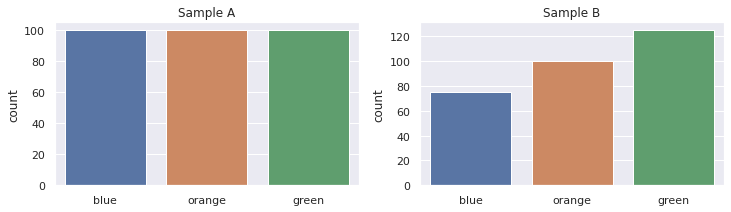

In [21]:
# Create two samples of a categorical variable
sample_a = np.concatenate((np.full(100,"blue"), np.full(100,"orange"), np.full(100,"green")))
sample_b = np.concatenate((np.full(75,"blue"), np.full(100,"orange"), np.full(125,"green")))
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.countplot(ax=axes[0], x=sample_a)
axes[0].set_title('Sample A')
sns.countplot(ax=axes[1], x=sample_b)
axes[1].set_title('Sample B')

In [22]:
# Create contingency table
dataset = pd.DataFrame({
    "sample": np.concatenate((np.full(300,"A"), np.full(300,"B"))),
    "colour": np.concatenate((sample_a, sample_b))
})
contingency_table = pd.crosstab(dataset['sample'], dataset['colour']) 
print(f'Contingency table:\n{contingency_table}')

Contingency table:
colour  blue  green  orange
sample                     
A        100    100     100
B         75    125     100


The proportion of categories are a bit different among the samples. We expect that the test detects this.

In [23]:
from scipy.stats import chi2_contingency

statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(
    contingency_table
)
print(f'Expected frequency table:\n{expected_frequencies}')
print(f'Statistic: {statistic:.3f}; P-value: {p_value:.3f}')
significance_level = 0.05
if p_value > significance_level:
    print('Distribution of samples is the same (fail to reject H0)')
else:
    print('Distribution of samples is not the same (reject H0)')

Expected frequency table:
[[ 87.5 112.5 100. ]
 [ 87.5 112.5 100. ]]
Statistic: 6.349; P-value: 0.042
Distribution of samples is not the same (reject H0)


- The "**test of independence**" is used to determine whether the observations of two categorial variables (expressed in a contingency table) are independent of each other. We will see this test in more detail in the next section.

## 2.5 Correlation tests <a name="2.5"></a>

It can be useful in data analysis and modeling to better **understand the relationships between variables**. The statistical relationship between two variables is referred to as their **correlation**. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variable's values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

- The performance of some machine learning algorithms can deteriorate if two or more variables are tightly related, called [**multicollinearity**](https://en.wikipedia.org/wiki/Multicollinearity). An example is a linear regression, where one of the correlated variables can be removed to improve the skill of the model.

- We may also be interested in the correlation between input variables with the output variable to provide insight into which variables may or may not be relevant as input for developing a model.

In this section we list out some statistical tests that we can use to check if two samples are related. 

Before we look at correlation methods, let’s define a dataset we can use to test the methods.

We will generate 1,000 samples of two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of 50 and a standard deviation of 10.

Sample A: mean=100.776 stdv=19.620
Sample B: mean=151.050 stdv=22.358


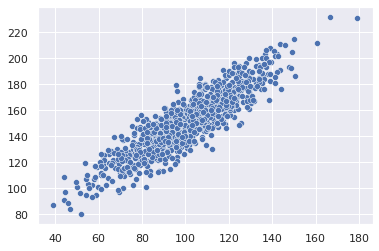

In [24]:
np.random.seed(1)
sample_size = 1000
sample_a = np.random.normal(size=sample_size, loc=100, scale=20)
sample_b = sample_a + np.random.normal(size=sample_size, loc=50, scale=10)
print(f'Sample A: mean={np.mean(sample_a):.3f} stdv={np.std(sample_a):.3f}')
print(f'Sample B: mean={np.mean(sample_b):.3f} stdv={np.std(sample_b):.3f}')
# plot
sns.scatterplot(x=sample_a, y=sample_b)

The **[covariance](https://en.wikipedia.org/wiki/Covariance) and [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix)** are used widely within statistics and multivariate analysis to **characterize the relationships between two or more variables**.

In [25]:
covariance = np.cov(sample_a, sample_b)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect. A problem with **covariance** is that it is **challenging to interpret**. The [**Pearson correlation coefficient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) can be used to **summarize the strength of the linear relationship between two data samples**. It is computed as the covariance of the two variables divided by the product of the standard deviation of each data sample (a normalized measurement of the covariance that gives an interpretable score). The correlation coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value below -0.5 or above 0.5 indicates a notable correlation, and a value below those values suggests a less notable correlation.

![](https://i.ibb.co/GF0qWVD/pearson-correlation.png)

Pearson correlation remains a consistent estimator of the population correlation even when the two variables are not bivariate normal. Even tests based on Pearson's correlation do not require normality if the samples are large enough because of the CLT.

The more important issue is whether the relationship between the variables is actually linear. Pearsons correlation only describes the linear part of the relationship, whereas Spearman's rho (which we will see next) is an estimate of any monotonic relationship form.

However, it's quite **sensitive to outliers and high levels of skewness**.

In [26]:
from scipy.stats import pearsonr

pearson_correlation, p_value = pearsonr(sample_a, sample_b)
print(f'Pearsons correlation: {pearson_correlation:.3f}')

significance_level = 0.05
if p_value > significance_level:
	print('The samples are uncorrelated (fail to reject H0).')
else:
	print('The samples are correlated (reject H0).')

Pearsons correlation: 0.888
The samples are correlated (reject H0).


Two variables may be **related by a nonlinear relationship**, such that the relationship is stronger or weaker across the distribution of the variables. In this case, the [**Spearman's rank correlation coefficient**](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables but will have slightly less power. As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively. Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these **statistics are calculated from the relative rank of values on each sample**. A linear relationship between the variables is not assumed, although a **[monotonic relationship](https://en.wikipedia.org/wiki/Monotonic_function)** (an increasing or decreasing relationship) is assumed. It is also useful with **ordinal data** and is **robust to outliers** (unlike Pearson correlation).


In [27]:
from scipy.stats import spearmanr

spearman_correlation, p_value = spearmanr(sample_a, sample_b)
print(f'Spearman correlation: {spearman_correlation:.3f}')

significance_level = 0.05
if p_value > significance_level:
	print('The samples are uncorrelated (fail to reject H0).')
else:
	print('The samples are correlated (reject H0).')

Spearman correlation: 0.872
The samples are correlated (reject H0).


The [**Kendall rank correlation coefficient**](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) is often used as a test statistic in a statistical hypothesis test to **establish whether two variables** may be regarded as statistically **dependent**. The intuition for the test is that it calculates a normalized score for the number of matching or concordant rankings between the two samples. As a statistical hypothesis test, the null hypothesis is that there is no association between the two samples.

In [28]:
from scipy.stats import kendalltau

kendall_correlation, p_value = kendalltau(sample_a, sample_b)
print(f'Kendall correlation coefficient: {kendall_correlation:.3f}')
significance_level = 0.05
if p_value > significance_level:
	print('Samples are uncorrelated (fail to reject H0)')
else:
	print('Samples are correlated (reject H0)')

Kendall correlation coefficient: 0.688
Samples are correlated (reject H0)


**Note**: It's common to compute a **matrix of the relationships between each pair of continuous variables in a dataset**. The result is a symmetric matrix called a **correlation matrix** with a value of 1.0 along the diagonal as each column always perfectly correlates with itself. The [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method of Pandas DataFrames computes pairwise correlation of columns (pearson, spearman and kendal methods are available).

The [**Pearson's chi-squared test**](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) is a nonparametric test used to assess **three types of comparisons** (see section Nonparametric tests). In this section we will see the "**test of independence**", which is used to determine **whether** the observations of **two categorial variables** (expressed in a contingency table) **are independent of each other**. The **variables** are considered **independent if the observed and expected frequencies are similar**. The **null hypothesis** is that the **variables are independent**.

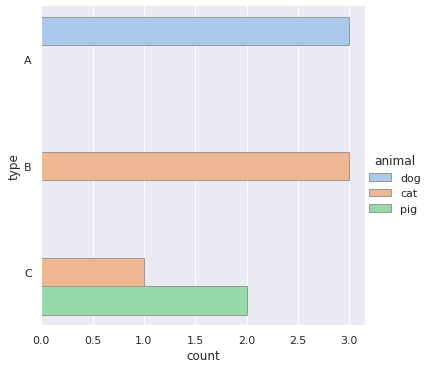

In [29]:
dataset = pd.DataFrame({
    "type": np.array(["A","A","A","B","B","B","C","C","C"]),
    "animal": np.array(["dog","dog","dog","cat","cat","cat","pig","pig","cat"])
    #"animal": np.array(["dog","cat","pig","cat","cat","pig","dog","pig","cat"])
})
sns.catplot(y="type", hue="animal", kind="count",
            palette="pastel", edgecolor=".6", data=dataset)

In [30]:
contingency_table = pd.crosstab(dataset['type'], dataset['animal']) 
print(contingency_table)

animal  cat  dog  pig
type                 
A         0    3    0
B         3    0    0
C         1    0    2


In [31]:
from scipy.stats import chi2_contingency

statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(
    contingency_table
)
print(f'Expected frequency table:\n{expected_frequencies}')
print(f'Statistic: {statistic:.3f}; P-value: {p_value:.3f}')
significance_level = 0.05
if p_value > significance_level:
    print('Variables are independent (fail to reject H0)')
else:
    print('Variables are dependent (reject H0)')

Expected frequency table:
[[1.33333333 1.         0.66666667]
 [1.33333333 1.         0.66666667]
 [1.33333333 1.         0.66666667]]
Statistic: 13.500; P-value: 0.009
Variables are dependent (reject H0)


The homogeneity test and independence test of Pearson's chi-squared test may sound the same. The difference is a matter of design. In the test of independence, samples are collected at random from two categorical variables. In the test of homogeneity, the data are collected by randomly sampling from each sub-group separately from a single categorical variable.

# References <a name="3"></a>

- Design and analysis of experiments, Douglas Montgomery.

- [Mathematical justifcation of hypothesis tests](https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1014&context=gradreports)



- [Scikit-posthocs python package](https://scikit-posthocs.readthedocs.io/en/latest/)

- Nonparametric Statistics for Non-Statisticians: A Step-by-Step

- [Statistical hypothesis tests in python](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)